# Assignment - 02
## Submitted by - SHIVAM SAHIL (2023aa05663)
## Subject - Video Analytics

In [15]:
# Necessary imports
import cv2
import matplotlib.pyplot as plt
from moviepy.video.io.VideoFileClip import VideoFileClip
import subprocess
import numpy as np

In [7]:
# Common Utilities
def get_video_path():
    return r'sample.mp4'

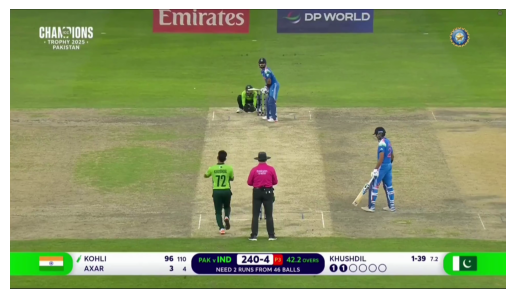

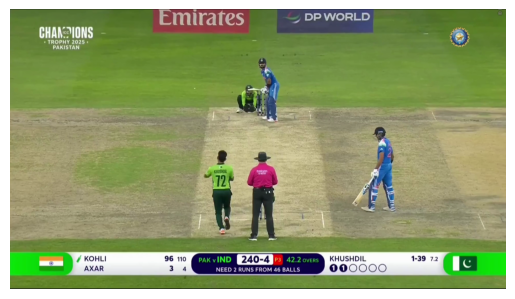

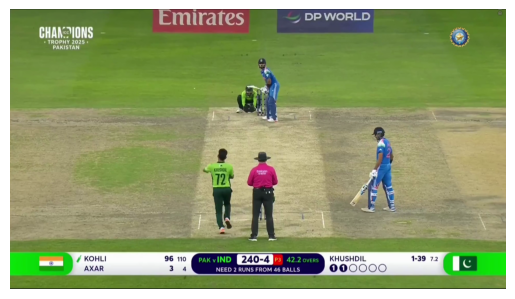

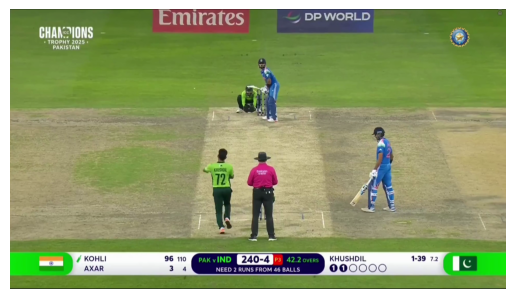

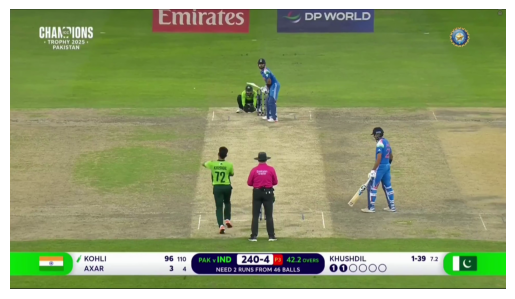

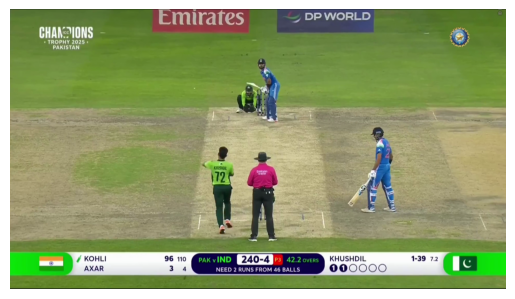

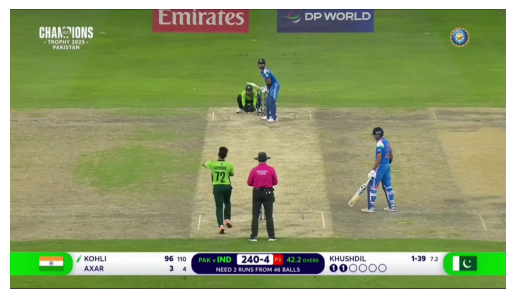

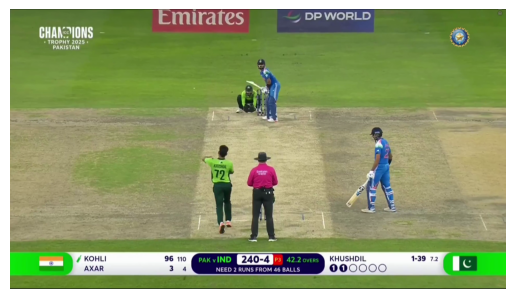

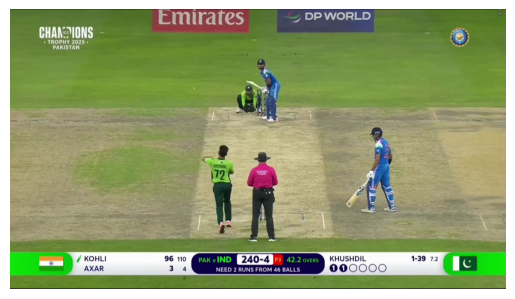

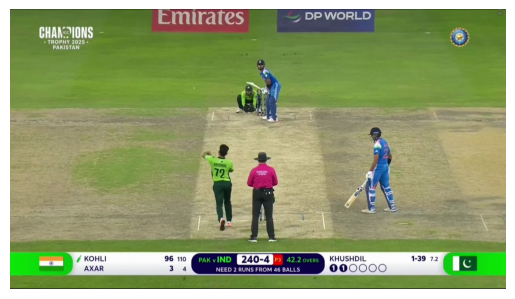

In [8]:
video_path = get_video_path()
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error reading video file")
    exit()
    
frame_count = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Convert frame from BGR to RGB (OpenCV uses BGR by default)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')  # Turn off axis labels
    plt.show()
    frame_count += 1

    # Break after displaying 10 frames (change this as needed)
    if frame_count == 10:
        break

# Release the video capture object
cap.release()

### Part 2 - Fetching Video Metadata

In [9]:
# Reading Video from Path
video_path = get_video_path()
# Load Video Clip File
video_clip = VideoFileClip(video_path)

# Extract video metadata
duration = video_clip.duration  # Duration of the video (in seconds)
fps = video_clip.fps  # Frames per second
width, height = video_clip.size  # Video dimensions (width x height)

# Display the extracted metadata
print(f"Video Duration: {duration} seconds")
print(f"Frames per Second (FPS): {fps}")
print(f"Video Dimensions: {width} x {height} pixels")


{'video_found': True, 'audio_found': True, 'metadata': {'major_brand': 'isom', 'minor_version': '512', 'compatible_brands': 'isomiso2avc1mp41', 'encoder': 'Lavf61.1.100'}, 'inputs': [{'streams': [{'input_number': 0, 'stream_number': 0, 'stream_type': 'video', 'language': None, 'default': True, 'size': [3456, 1950], 'bitrate': 7264, 'fps': 60.0, 'codec_name': 'h264', 'profile': '(High)', 'metadata': {'Metadata': '', 'handler_name': 'Core Media Video', 'vendor_id': '[0][0][0][0]', 'encoder': 'Lavc61.3.100 libx264'}}, {'input_number': 0, 'stream_number': 1, 'stream_type': 'audio', 'language': None, 'default': True, 'fps': 48000, 'bitrate': 62, 'metadata': {'Metadata': '', 'handler_name': 'Core Media Audio', 'vendor_id': '[0][0][0][0]'}}], 'input_number': 0}], 'duration': 19.9, 'bitrate': 7328, 'start': 0.0, 'default_video_input_number': 0, 'default_video_stream_number': 0, 'video_codec_name': 'h264', 'video_profile': '(High)', 'video_size': [3456, 1950], 'video_bitrate': 7264, 'video_fps'

### Processing Video Metadata using ffprobe and sub process

In [14]:
# Command to get video metadata using ffprobe
video_path = get_video_path()
ffprobe_command = f'ffprobe -v error -select_streams v:0 -show_entries stream=height,width,duration,r_frame_rate,bit_rate -of default=noprint_wrappers=1:nokey=1 "{video_path}"'

dur_cmd = f'ffprobe -v error -show_entries format=duration -of default=noprint_wrappers=1:nokey=1 "{video_path}"'

# Execute the command using subprocess.
process = subprocess.Popen(ffprobe_command, shell=True, stdout=subprocess.PIPE,
                           stderr=subprocess.STDOUT)
output, _ = process.communicate()


# Decode and display the extracted metadata
metadata = output.decode('utf-8').split('\n')#''1980'+10=>198010 1980+10=>1990
video_width = int(metadata[1])
video_height = int(metadata[0])
video_duration = eval(metadata[3])
frame_rate = eval(metadata[2])
bit_rate = int(metadata[4])


print(f"Video Duration: {video_duration} seconds")
print(f"Frames per Second (FPS): {frame_rate}")
print(f"Video Dimensions: {video_width} x {video_height} pixels")
print(f"Bitrate: {bit_rate} bps")
print('Metadata ', metadata)

Video Duration: 19.866667 seconds
Frames per Second (FPS): 60.0
Video Dimensions: 1950 x 3456 pixels
Bitrate: 7264397 bps
Metadata  ['3456', '1950', '60/1', '19.866667', '7264397', '']


### Color Histogram Computation

FPS =  60.0
Total Frames =  1192
Length of histogram =  1192


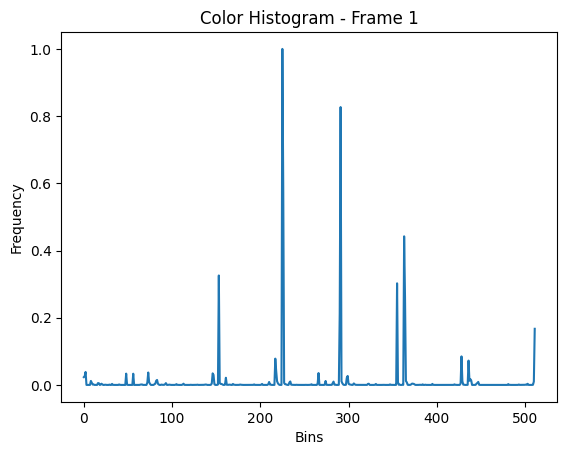

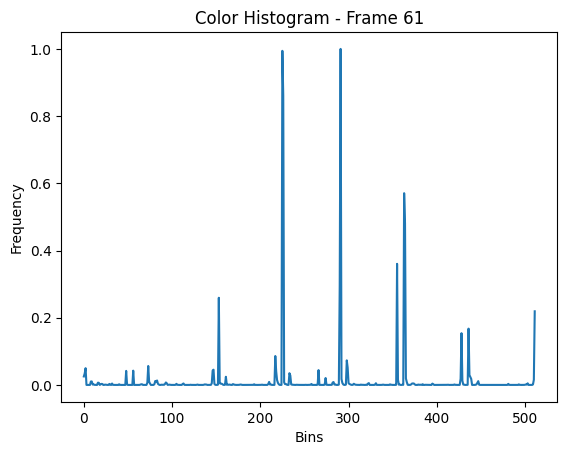

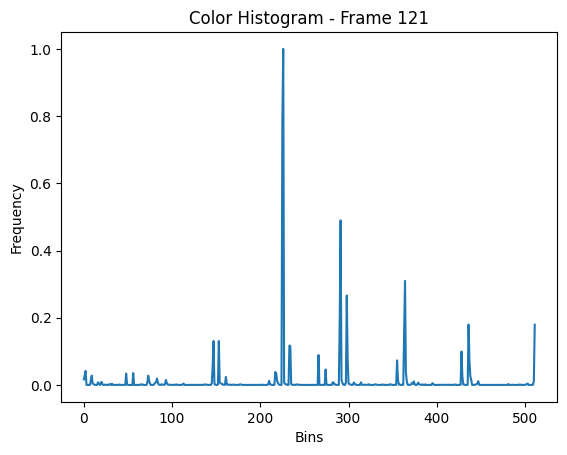

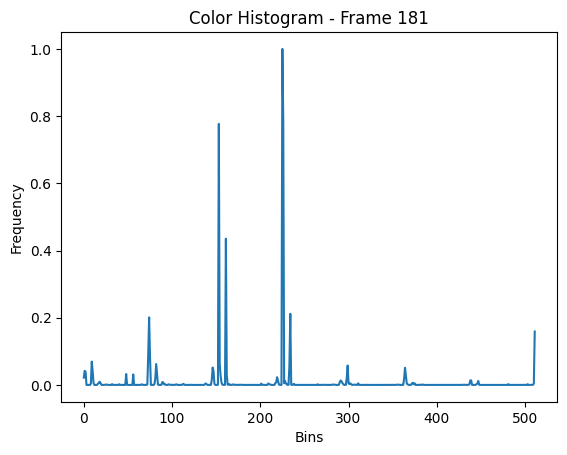

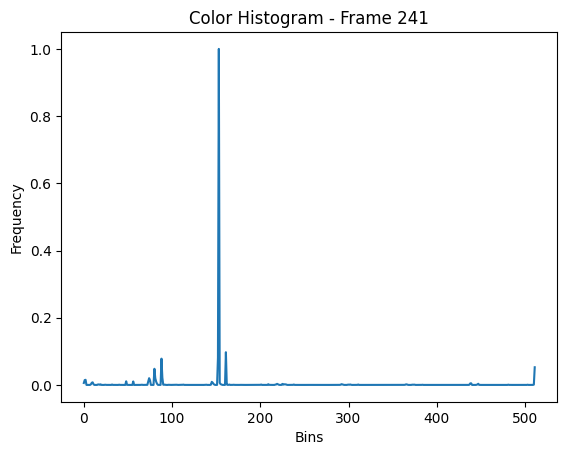

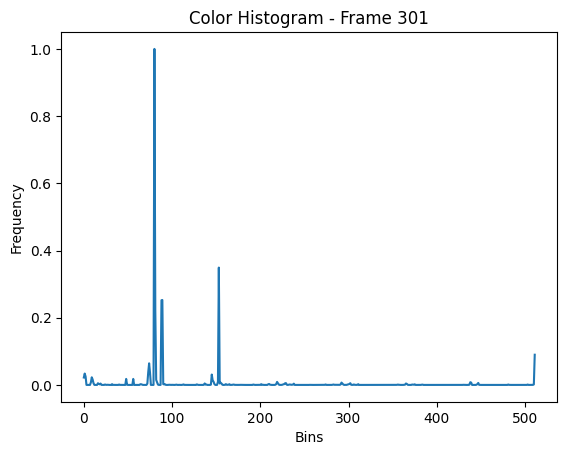

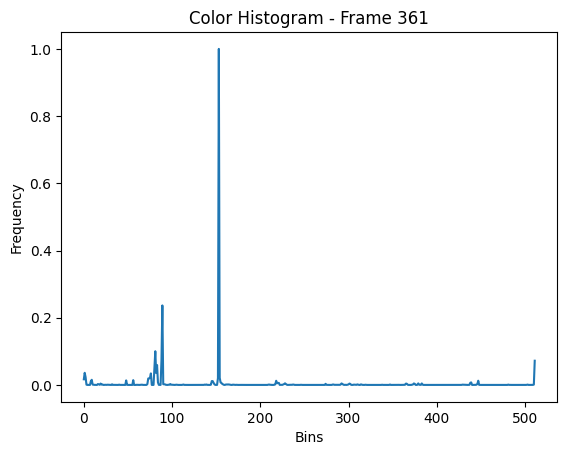

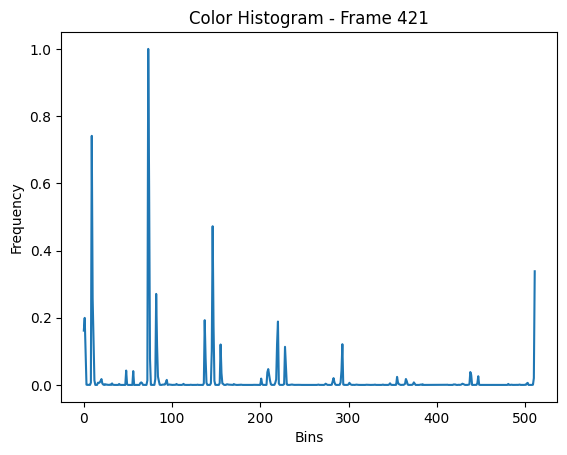

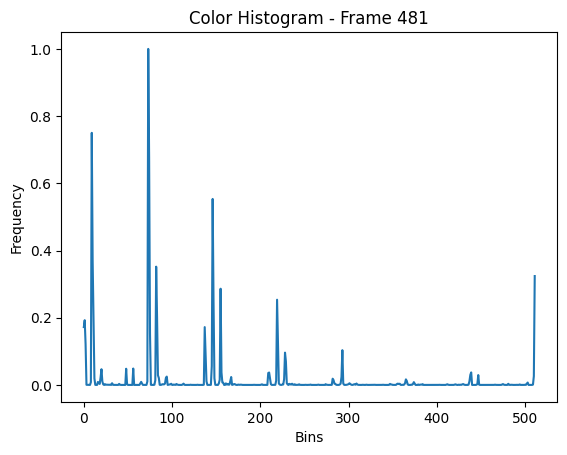

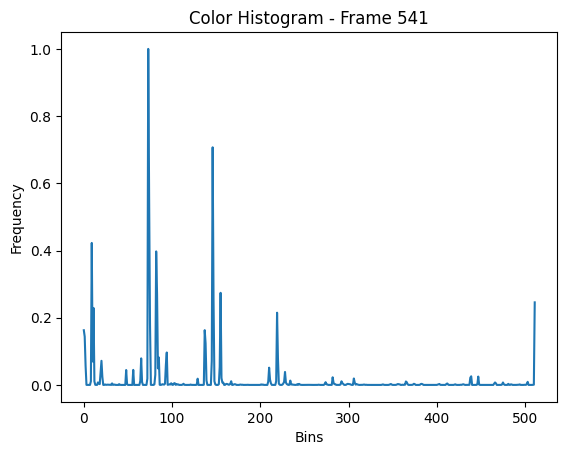

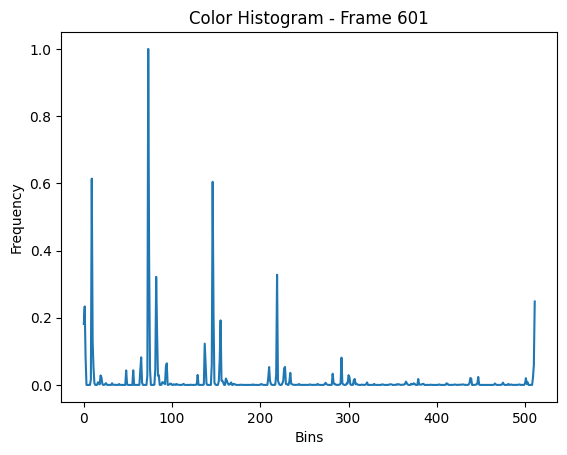

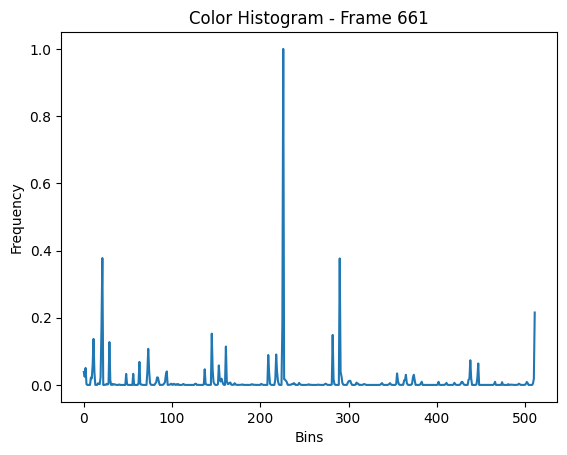

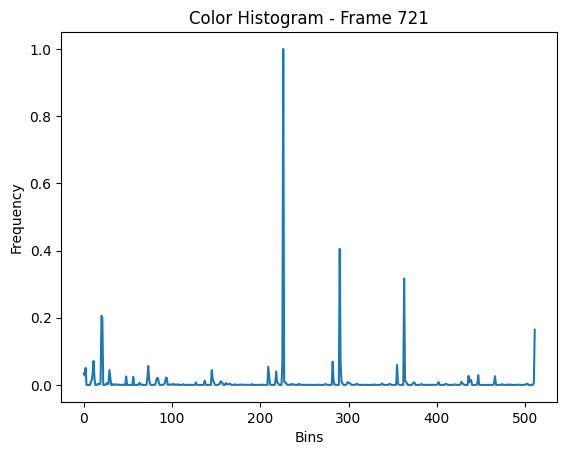

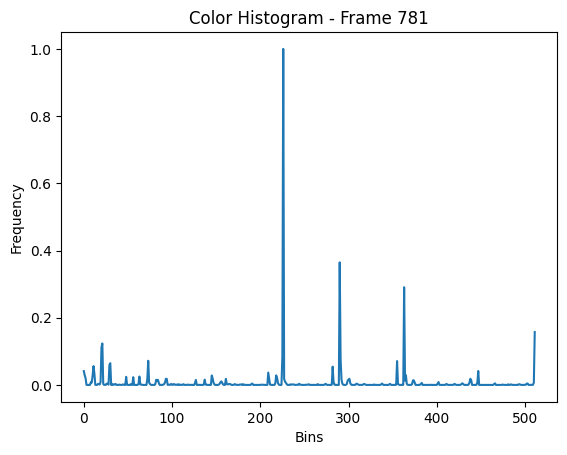

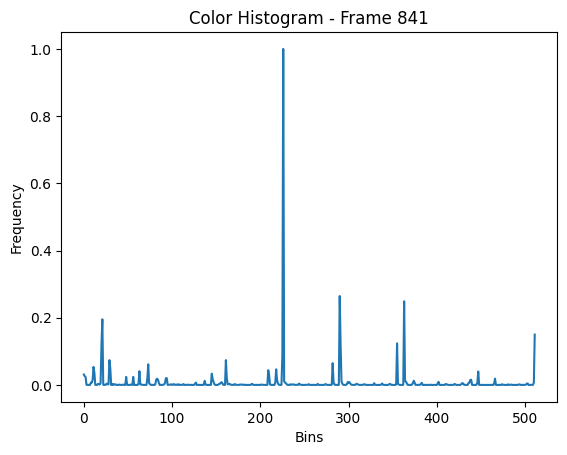

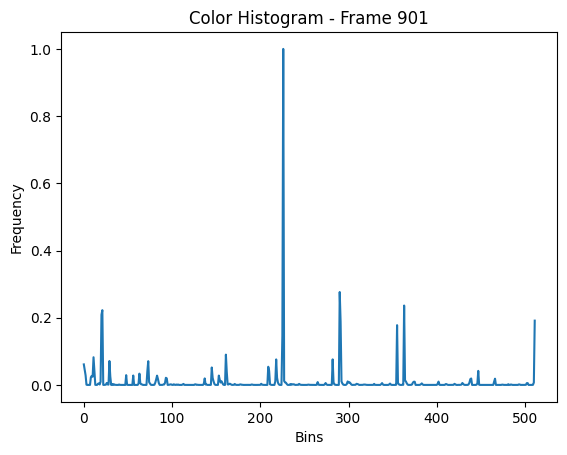

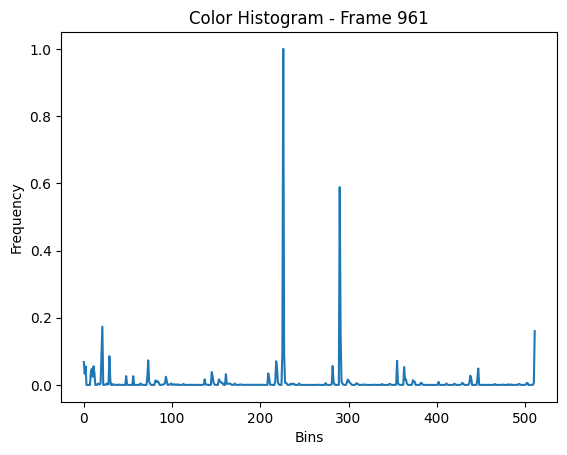

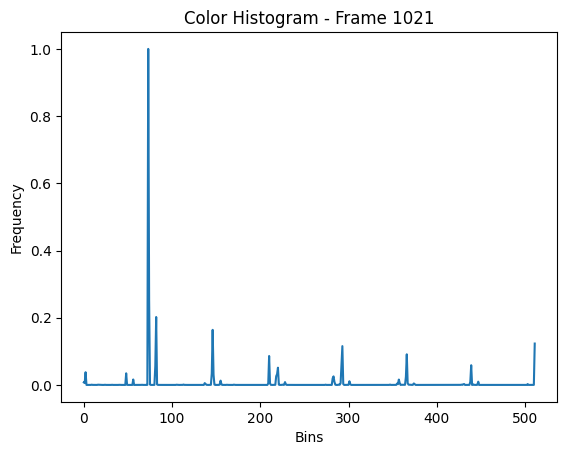

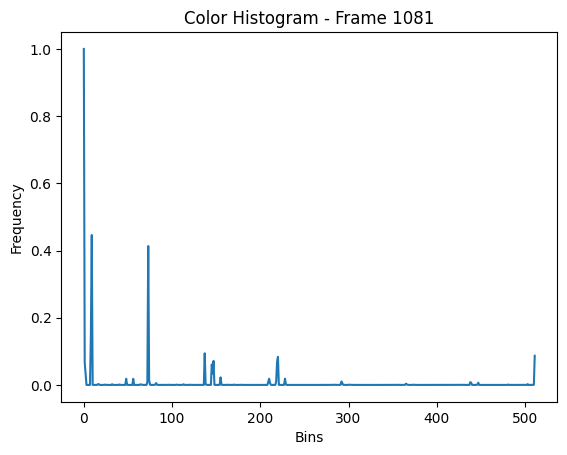

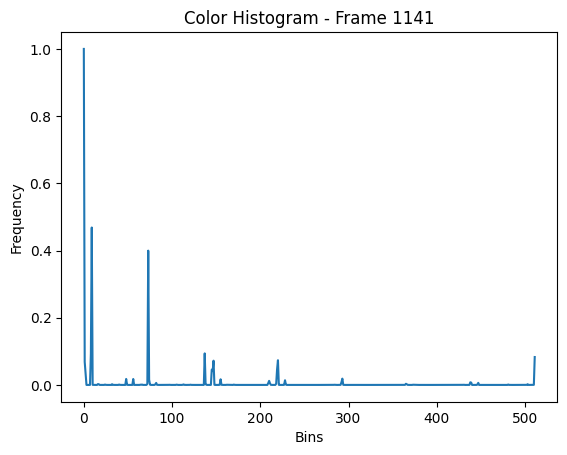

In [17]:
video_path = get_video_path()

def compute_color_histogram(frame):
    # Convert the frame from BGR to RGB color space
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Compute the color histogram
    hist = cv2.calcHist([rgb_frame], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    # Normalize the histogram
    cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    return hist

# Open the video file
video = cv2.VideoCapture(video_path)

# Get the video frames per second (fps) and total number of frames
fps = video.get(cv2.CAP_PROP_FPS)
print('FPS = ', fps)
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frames = ', total_frames)

# Calculate the number of frames to process based on the desired duration (30 seconds)
num_frames_to_process = int(fps * 30)

# Initialize a list to store the color histograms for each frame
color_histograms = []

# Process each frame of the video
for i in range(num_frames_to_process):
    ret, frame = video.read()
    if not ret:
        break

    # Compute the color histogram for the current frame
    hist = compute_color_histogram(frame)
    color_histograms.append(hist)

# Release the video capture object
video.release()
print('Length of histogram = ', len(color_histograms))

# Plot the color histogram for each frame
step_size = 60 # Plotting every 60th frame - 20 frames (to step down too many frames display)
for i, hist in enumerate(color_histograms):
    if i % step_size == 0:
        plt.figure()
        plt.title(f'Color Histogram - Frame {i+1}')
        plt.xlabel('Bins')
        plt.ylabel('Frequency')
        plt.plot(hist.flatten())
        plt.show()